<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#we will need this imports for preprocessing sections
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [82]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

## Loading Data to Pandas DataFrame

In [3]:
df = pd.read_csv("./real-estate.csv")
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Dropping Nan-Values

In [5]:
# Drop rows with any missing values
print(df.shape)
#for NaN values
df.dropna(inplace = True)
print(f"after dropping nans: {df.shape}")

#eliminate ? values
for (column_name , _) in df.items():
    
    mask = df[f"{column_name}"] == '?'
    
    df = df[~mask]
    print(f"after dropping ? value from {column_name}: {df.shape} ")

print(f"final shape {df.shape}")

(414, 8)
after dropping nans: (414, 8)
after dropping ? value from No: (414, 8) 
after dropping ? value from X1 transaction date: (414, 8) 
after dropping ? value from X2 house age: (414, 8) 
after dropping ? value from X3 distance to the nearest MRT station: (414, 8) 
after dropping ? value from X4 number of convenience stores: (414, 8) 
after dropping ? value from X5 latitude: (414, 8) 
after dropping ? value from X6 longitude: (414, 8) 
after dropping ? value from Y house price of unit area: (414, 8) 
final shape (414, 8)


## Droping Unnecessary Columns

In [6]:
y = df["Y house price of unit area"]

#Number is just an index value >> No useful data
#Y is output not learning input
df = df.drop(['No',"Y house price of unit area"],axis = 1)
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


## Splitting Data to Train and Test

In [12]:
xtrain , xtest , ytrain , ytest = train_test_split(df,y,test_size = 0.1 , random_state = 1)

In [8]:
def standardScalerFunction(data):
    scaler = MinMaxScaler().fit(data)
    return scaler.transform(data.astype(float))

## Visualizing Data Distribution and Correlation

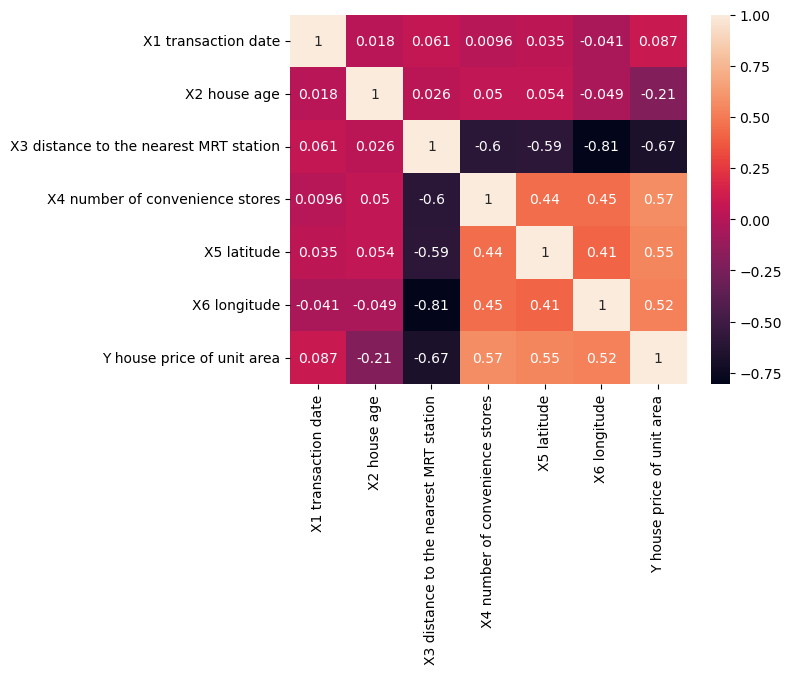

In [16]:
import seaborn as sns

df.insert(6 ,"Y house price of unit area", y)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


inferred from correlation map, transaction date and house age are not useful for our predictions in our regression models

In [17]:
'''
    this function will plot given column boxplot and save it in ./boxplots/ directory
    args -> 
        title : given feature(column) name(will be used for saving plot)
        data: column data which we are going to visualize its Distribution and outliers ni plot
'''
def box_plot(data,title):
    plt.boxplot(data, patch_artist=True)
    plt.title(f"{title} BOX PLOT")
    plt.ylabel(f"{title} Rate")
    plt.savefig(f'./boxplots/{title}.png')
    plt.close()


In [18]:
for (column_name , _) in df.items():
    if column_name != "Y house price of unit area":
        box_plot(df[f"{column_name}"],column_name)

In [19]:
'''
    this function will plot output(y column) and each feature of our data
    args -> 
        title : given feature(column) name(will be used for saving plot)
        x: column data which we are going to visualize its Distribution with outputs
'''
def  house_price_plotter(title,x,y):
    plt.figure(figsize=(10,5))
    plt.plot(x,y,'r')
    plt.xlabel(title)
    plt.ylabel('house price')
    plt.savefig(f'./house_price_plots/{title}.png')
    plt.close()

In [20]:
for (column_name , _) in df.items():

    if column_name != "Y house price of unit area":
        house_price_plotter(column_name,df[f"{column_name}"],df["Y house price of unit area"])

after analyzing the plots and boxplot and correlation plots we may infer that X1 transaction date is not useful for training and prediction

## Linear Regression

Coefficients:
 [ 5.67415163e+00 -2.60891138e-01 -4.61447772e-03  1.08210515e+00
  2.31868562e+02 -1.96332748e+01]
Mean Squared Error: 39.62894436594292
R2 Score: 0.7544596848431462


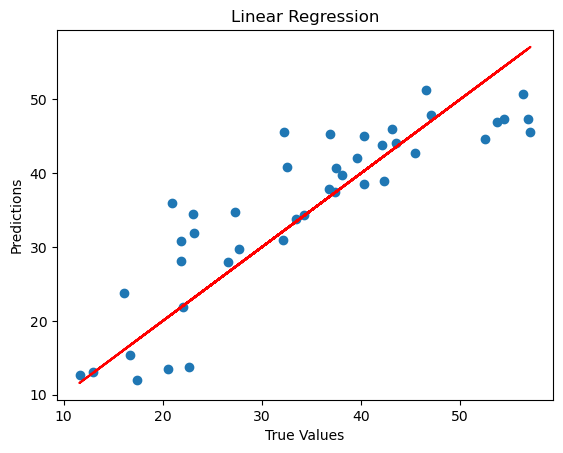

In [13]:
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Linear Regression')
plt.show()

## Polynomial Regression

Coefficients:
 [ 6.09398270e+00 -1.14487231e+04  3.32260516e+02  1.94797986e+01
  8.43901033e+03  4.32424856e+05  1.17642942e+06  6.75534977e+00
  7.07796053e-02 -3.30603724e-03 -6.58447399e-01 -6.86060787e+01
 -1.15400357e+02  1.95572059e-02  2.14095151e-05  1.43689227e-02
 -7.18530735e+00 -2.43919587e+00  3.63920776e-08 -1.47784015e-03
 -2.90087976e-01 -4.59648241e-02  8.67376149e-03 -1.17235156e+02
 -3.44334445e+01  4.60125869e+03 -4.30243991e+03 -3.44152331e+03]
Mean Squared Error: 32.573218334670756
R2 Score: 0.798176852209024


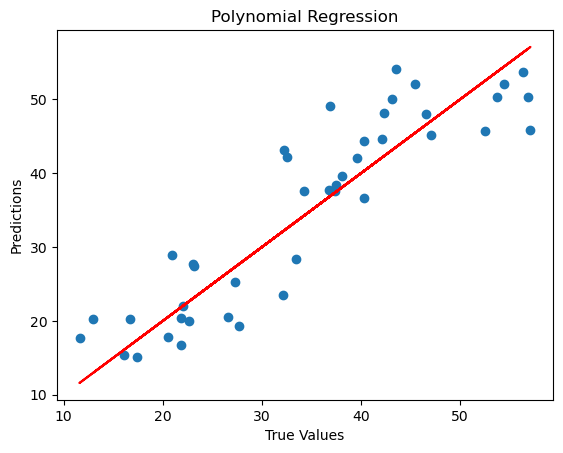

In [14]:

poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(xtrain)
x_poly_test = poly_features.transform(xtest)
poly_model = LinearRegression()
poly_model.fit(x_poly_train, ytrain)
poly_predictions = poly_model.predict(x_poly_test)
mse = mean_squared_error(ytest, poly_predictions)
r2 = r2_score(ytest, poly_predictions)

print("Coefficients:\n", poly_model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, poly_predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression')
plt.show()

## Ridge Regression

Coefficients:
 [ 6.06168297e+00 -2.43451327e-01 -5.51022315e-03  1.21020382e+00
  8.45610349e+00 -1.44313988e+00]
Mean Squared Error: 39.51165547454114
R2 Score: 0.7551864049670347


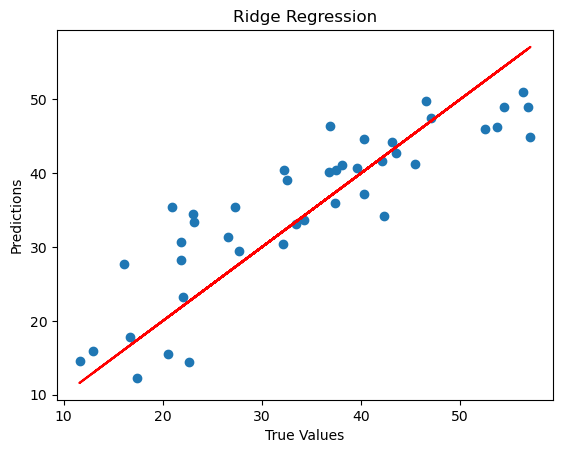

In [15]:

model = Ridge(alpha=1.0)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()


## Lasso Regression

Coefficients:
 [ 5.04520578 -0.24170058 -0.00553271  1.20605859  0.         -0.        ]
Mean Squared Error: 39.03198442213601
R2 Score: 0.7581584392531762


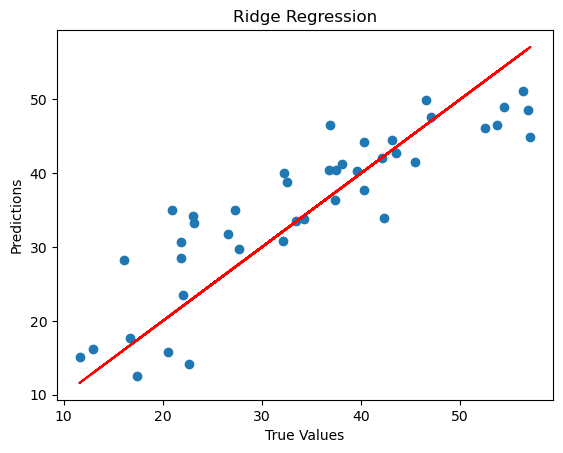

In [16]:
model = Lasso(alpha=0.1)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()

## Elastic Net Regression

Coefficients:
 [ 3.48833846 -0.24189208 -0.00549173  1.21675707  0.         -0.        ]
Mean Squared Error: 38.252396478507364
R2 Score: 0.7629887538738092


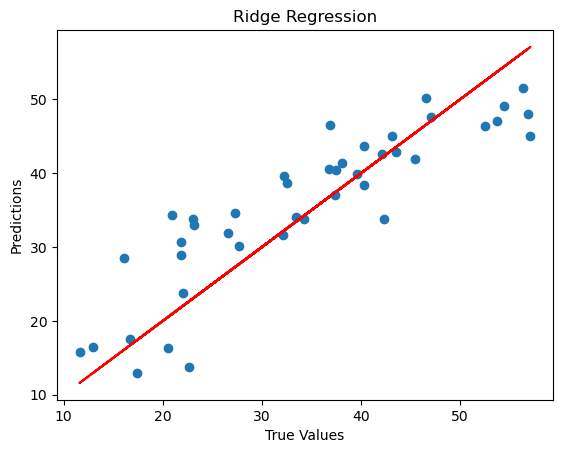

In [17]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)


print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()

## XGBoost Regression 

Mean Squared Error: 25.557195969555014
R2 Score: 0.8416480162847079


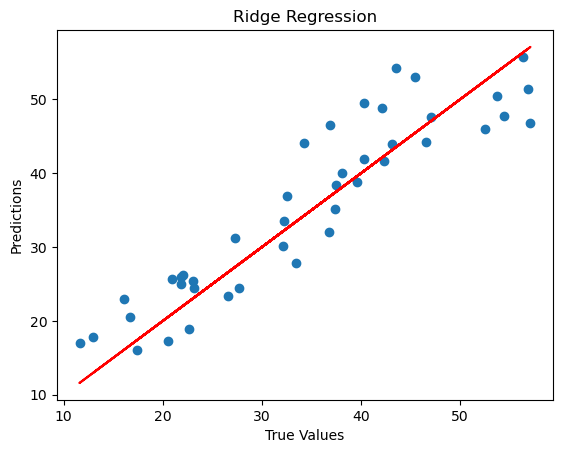

In [18]:
model = XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1 ,max_depth = 6, n_estimators = 100)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()

# Assosiation Rules

Import Libraries

In [83]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns


Data Loading

In [84]:
df = pd.read_csv('grocery.csv', header=None)
df.head(20)

,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


Preprocess Data

In [85]:
#lets make df ready for being processed with TransactionEncoder(it should be data series not dataframe)
ds = df[0].apply(lambda transaction: transaction.split(','))
print(type(df))
print(type(ds))
print(ds)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
0                  [MILK, BREAD, BISCUIT]
1      [BREAD, MILK, BISCUIT, CORNFLAKES]
2                 [BREAD, TEA, BOURNVITA]
3               [JAM, MAGGI, BREAD, MILK]
4                   [MAGGI, TEA, BISCUIT]
5                 [BREAD, TEA, BOURNVITA]
6                [MAGGI, TEA, CORNFLAKES]
7            [MAGGI, BREAD, TEA, BISCUIT]
8                [JAM, MAGGI, BREAD, TEA]
9                           [BREAD, MILK]
10    [COFFEE, COCK, BISCUIT, CORNFLAKES]
11    [COFFEE, COCK, BISCUIT, CORNFLAKES]
12             [COFFEE, SUGER, BOURNVITA]
13                  [BREAD, COFFEE, COCK]
14                [BREAD, SUGER, BISCUIT]
15            [COFFEE, SUGER, CORNFLAKES]
16              [BREAD, SUGER, BOURNVITA]
17                 [BREAD, COFFEE, SUGER]
18                 [BREAD, COFFEE, SUGER]
19        [TEA, MILK, COFFEE, CORNFLAKES]
Name: 0, dtype: object


Apply TransactionEncoder

In [86]:
encoder = TransactionEncoder()
encoded_transaction = encoder.fit_transform(ds)
df = pd.DataFrame(encoded_transaction, columns=encoder.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


Generate Frequent Itemsets

In [87]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BREAD, BISCUIT)"


Generate Association Rules

In [103]:
minded_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
minded_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BREAD),(BISCUIT),0.65,0.35,0.2,0.307692,0.879121,-0.0275,0.938889,-0.282051
1,(BISCUIT),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
2,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.750000,0.250000
3,(BREAD),(MILK),0.65,0.25,0.2,0.307692,1.230769,0.0375,1.083333,0.535714
4,(BREAD),(SUGER),0.65,0.30,0.2,0.307692,1.025641,0.0050,1.011111,0.071429
5,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.050000,0.035714
6,(BREAD),(TEA),0.65,0.35,0.2,0.307692,0.879121,-0.0275,0.938889,-0.282051
7,(TEA),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
8,(COFFEE),(CORNFLAKES),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
9,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429


In [ ]:
#pip install matplotlib seaborn pandas

Display Rules

C:\Users\abt\AppData\Local\Temp\ipykernel_6816\3061402404.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = minded_rules.pivot("antecedents", "consequents", "confidence")


Text(0.5, 1.0, 'Heatmap of confidence Values')

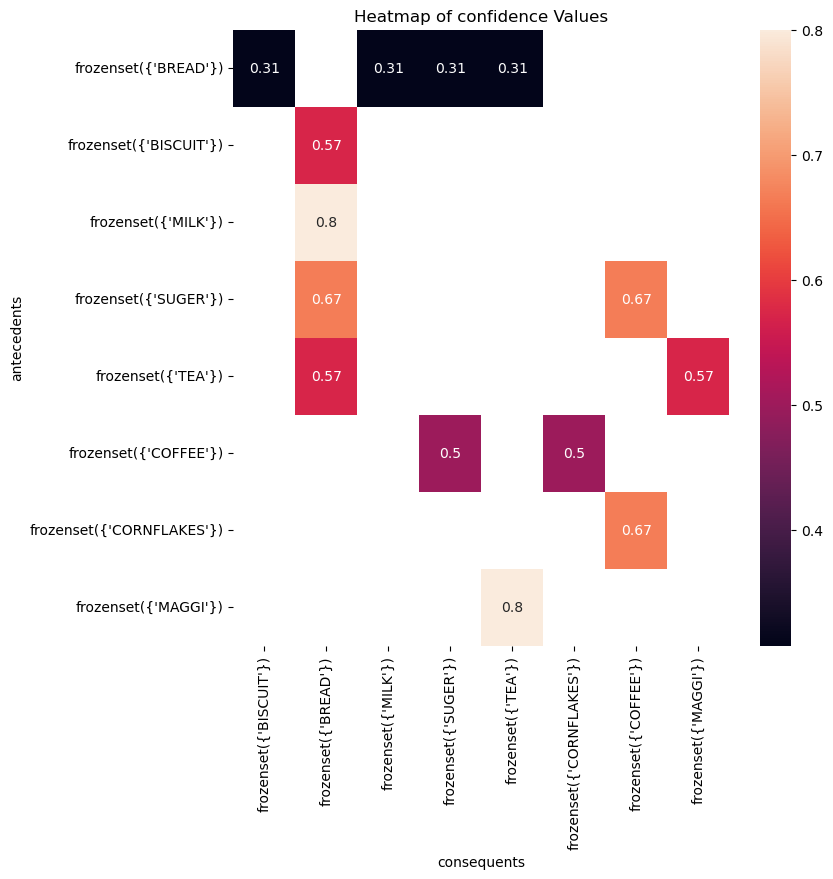

In [108]:
pivot_table = minded_rules.pivot("antecedents", "consequents", "confidence")
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True)
plt.title('Heatmap of confidence Values')

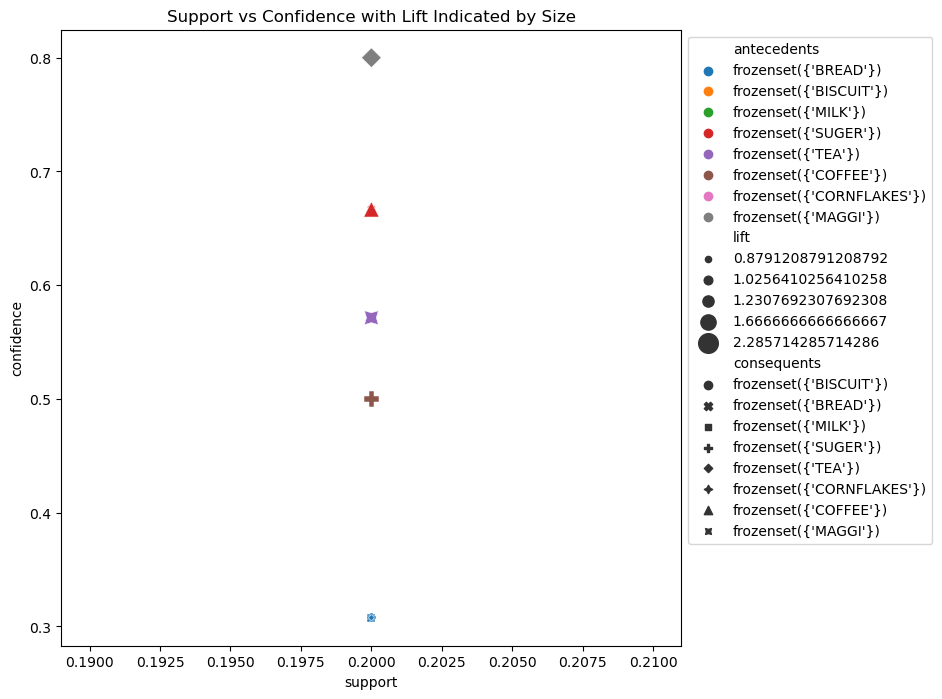

In [111]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=minded_rules, x='support', y='confidence', size='lift', hue='antecedents', style='consequents', sizes=(20, 200))
plt.title('Support vs Confidence with Lift Indicated by Size')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
